In [27]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
data_df = city_df.merge(ride_df, on="city")
# Display the data table for preview

cities_df = data_df.groupby("city")

summary_df = pd.DataFrame ({"Market Type": cities_df["type"].max(),
                            "Avg Fare": cities_df["fare"].mean(),
                            "Total Rides": cities_df["ride_id"].count(),
                            "Total Drivers": cities_df["driver_count"].sum(),
                            "City": cities_df["city"].max()})


urban_sum =summary_df.loc[summary_df["Market Type"] == "Urban"]

rural_sum = summary_df.loc[summary_df["Market Type"] == "Rural"]

suburban_sum = summary_df.loc[summary_df["Market Type"] == "Suburban"]

## Bubble Plot of Ride Sharing Data

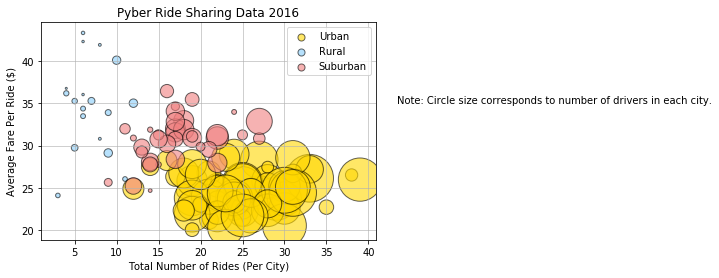

In [28]:
# Obtain the x and y coordinates for each of the three city types


# Build the scatter plots for each city types
Urban = plt.scatter(urban_sum["Total Rides"], urban_sum["Avg Fare"], s=urban_sum["Total Drivers"], c="gold", alpha=.6, edgecolors="black")
Rural = plt.scatter(rural_sum["Total Rides"], rural_sum["Avg Fare"], s=rural_sum["Total Drivers"], c="lightskyblue", alpha=.6, edgecolors="black")
Suburban = plt.scatter(suburban_sum["Total Rides"], suburban_sum["Avg Fare"], s=suburban_sum["Total Drivers"], c="lightcoral", alpha=.6, edgecolors="black")

# Incorporate the other graph properties
labels = ["Urban", "Rural", "Suburban"]
plt.grid(alpha=.75)
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare Per Ride ($)")
legend = plt.legend(markerscale=.5, labels=labels)

legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
# Create a legend

# Incorporate a text label regarding circle size
plt.figtext(s = "Note: Circle size corresponds to number of drivers in each city.", x=.95, y=.6)
# Save Figure
plt.savefig("Pyberdataplot.png")
plt.show()

In [29]:
# Show plot
plt.show()

## Total Fares by City Type

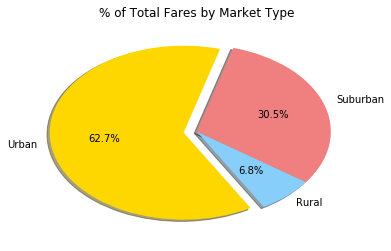

In [30]:
# Calculate Type Percents
citytype = data_df.groupby("type")
# Build Pie Chart
farepie = plt.pie(citytype["fare"].sum(), autopct = "%.1f%%", 
                  labels = ["Rural", "Suburban", "Urban"], 
                  colors = ["lightskyblue", "lightcoral", "gold"],
                  explode = [0,0,.1],
                  startangle=300, shadow=True)
plt.title("% of Total Fares by Market Type")


# Save Figure
plt.savefig("farepie.png")
plt.show()



In [31]:
citytype["driver_count"].sum()


type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

## Total Rides by City Type

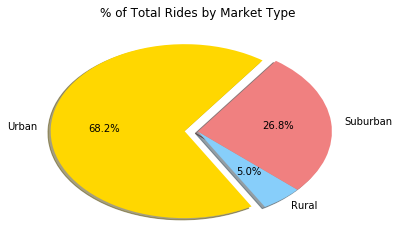

In [32]:
# Calculate Ride Percents

# Build Pie Chart
ridepie =  plt.pie(citytype["ride_id"].sum(), autopct = "%.1f%%", 
                  labels = ["Rural", "Suburban", "Urban"], 
                  colors = ["lightskyblue", "lightcoral", "gold"],
                  explode = [0,0,.1],
                  startangle=300, shadow=True)
plt.title("% of Total Rides by Market Type")
# Save Figure
plt.savefig("ridepie.png")
plt.show()


## Total Drivers by City Type

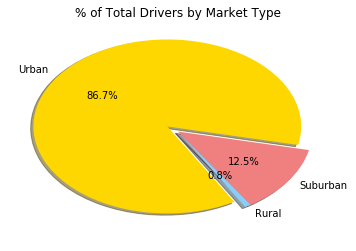

In [33]:
# Calculate Driver Percents

# Build Pie Charts
driverpie =  plt.pie(citytype["driver_count"].sum(), autopct = "%.1f%%", 
                  labels = ["Rural", "Suburban", "Urban"], 
                  colors = ["lightskyblue", "lightcoral", "gold"],
                  explode = [0,0,.1],
                  startangle=300, shadow=True)
plt.title("% of Total Drivers by Market Type")
# Save Figure
plt.savefig("driverpie.png")
plt.show()



In [34]:
#1
#There are a disproportionate amount of drivers in Urban markets compared to the number of rides in Urban markets.
#If some of these drivers were to move out of the city into the Rural markets, it could benefit them and the customer.
#The suburban riders would have shorter wait times, and drivers would earn higher fares compared to Urban markets.
#Rural markets account for 5% of all rides, but less than 1% of drivers.

#2
#Fares look like they respond to driver concentration, with fares being highest where the drivers are most scarce. This likely 
#is a factor in the fare calculation, but it's probably more heavily influenced by the fact that rides in Rural and Suburban 
#markets are going to be much longer and for much greater distances than fares within Urban markets.

#3
#Pyber is not a low-cost transportation option, with most fares in Urban markets starting at over $20 per ride.
#It is likely that Pyber could greatly increase its customer base by bringing its fares into line with competing services, since
#cost is a major decision criteria for ridesharing consumers.

